# **[Chapter 01]**  
**┗ Water Circulation System 설비 예지 보전**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「시계열 센서 데이터 분석」
* 🥇Session 3 - 「이상탐지 모델링」

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 💦


A사는 Water Circulation System을 운영하는 유지보수 업체다. 사업이 확장됨에 따라 많은 고객을 대상으로 Water Circulation System을 설치하고 있다.  
Water Circulation System은 한 번 고장이 나면 심각한 피해를 발생시키기 때문에 사전에 이상징후를 발견하고 조치를 통해 고장을 사전에 방지하는  
활동이 매우 중요하다. A사는 사업이 확장됨에 따라 관리해야할 업체들이 증가하고 있고, 고장이 발생한다면 사업에 큰 지장을 초래하기  
때문에 이상진단 모델을 통해서 사전 유지보수 활동을 전개해나가고자 한다.

> **데이터**

* 시계열 센서 데이터 (Water Circulation System)
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|


## **문제해결 프로세스 정의**
---
> **문제정의**


▶ 사업 확장으로 인한 관리 Point 증가에 따른 운영 및 유지보수 Resource 부족<br>
▶ Water Circulation System 고장으로 인한 리스크 발생
  

> **기대효과**


▶ 이상진단 시스템을 통한 사전 유지보수를 통해 고장 발생으로 인한 리스크 감소<br>
▶ 이상진단 솔루션 제공을 통한 추가 고객 유치


> **해결방안**


▶ 모델링을 통한 이상진단 시스템 구축 및 운영<br>
▶ Session 1 🥉<br>
 - Data 전처리 및 EDA<br>
▶ Session 2 🥈<br>
 - 시계열 센서 데이터 분석 <br>
▶ Session 3 🥇 <br>
 - 이상탐지 모델링<br>


> **성과측정**  


▶ 이상진단 시스템 활용 전/후 고장 발생률 비교<br>
▶ 이상진단 솔루션 운영 전/후 신규 고객 증가 및 기존 고객 만족도 조사


> **현업적용**  


▶ 이상진단 모델 생성<br>
▶ 실시간 데이터 수집 체계 구축<br>
▶ 실시간 이상 진단 모델 실행 및 결과값 출력<br>
▶ 결과값 기반 모니터링 시스템(이상진단 대시보드) 운영


> **주요 코드 미리 살펴보기**  


▶ Session 1 → .value_counts(normalize=True), plt.plot(df_anomaly.index, df_anomaly[''], 'o', color='red', markersize=5);<br>
▶ Session 2 → enumerate(df.columns[1:8]), sns.distplot(), .corr(), sns.heatmap(mask=np.triu(df_num.corr()))<br>
▶ Session 3 → train_test_split(stratify=Y), np.where(), classification_report(), clf.decision_function()<br>


## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

In [10]:
# ▶ pd.set option
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv("chapter01_df.csv", sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [11]:
df.shape

(1063, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [13]:
df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

In [14]:
df.describe

<bound method NDFrame.describe of                  datetime  Accelerometer1RMS  Accelerometer2RMS   Current  \
0     2020-03-09 16:16:30           0.027545           0.041127  0.673506   
1     2020-03-09 16:16:31           0.027997           0.039100  0.772264   
2     2020-03-09 16:16:32           0.028418           0.038872  0.675520   
3     2020-03-09 16:16:33           0.027625           0.039366  0.566279   
4     2020-03-09 16:16:34           0.027484           0.041854  1.292170   
...                   ...                ...                ...       ...   
1058  2020-03-09 16:36:26           0.026954           0.040592  1.200720   
1059  2020-03-09 16:36:27           0.027371           0.040530  1.318550   
1060  2020-03-09 16:36:28           0.027557           0.039432  1.068740   
1061  2020-03-09 16:36:29           0.027456           0.038556  1.127880   
1062  2020-03-09 16:36:30           0.028026           0.038939  1.321820   

      Pressure  Temperature  Thermocouple

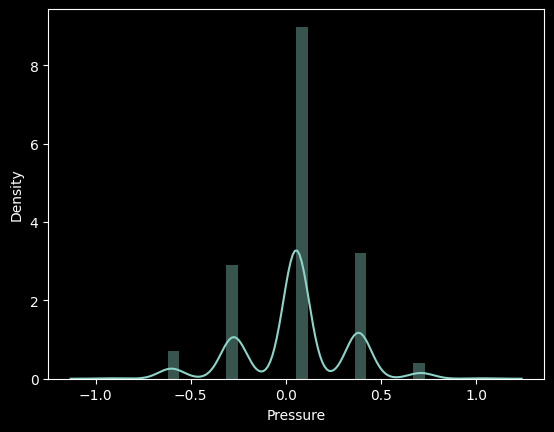

In [15]:
# ▶ Outlier 확인(음수값 필드), pressure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Pressure']);

### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [19]:
# ▶ Anomaly 및 Change Point 확인 (1) - 'anomaly'
# ▶ Target ratio(%) 확인
df['anomaly'].value_counts()
anomaly_df = pd.DataFrame({'count': df['anomaly'].value_counts(),
                           'ratio(%)': df['anomaly'].value_counts(normalize=True)*100})
anomaly_df.index.name = ''
anomaly_df

,count,ratio(%)
,,
0.0,730,68.673565
1.0,333,31.326435


In [22]:
# ▶ Anomaly 및 Change Point 확인 (2) - 'chagepoint'
# ▶ Target ratio(%) 확인
change_df = pd.DataFrame({"count":df['changepoint'].value_counts(),"ratio(%)":df['changepoint'].value_counts(normalize=True)*100})
change_df.index.name = ''
change_df

,count,ratio(%)
,,
0.0,1059,99.623706
1.0,4,0.376294


In [23]:
# ▶ data split
df_anomaly = df[df['anomaly']==1]
df_change = df[df['changepoint']==1]
df_normal  = df[df['changepoint']==0]

## **🥈Session 2**  
**┗ 시계열 센서 데이터 분석**  
---
* 시계열 센서 데이터 시각화 및 이상(abnormal) 데이터 탐색
* Contextual Anomaly Detection vs Point Anomaly Detection

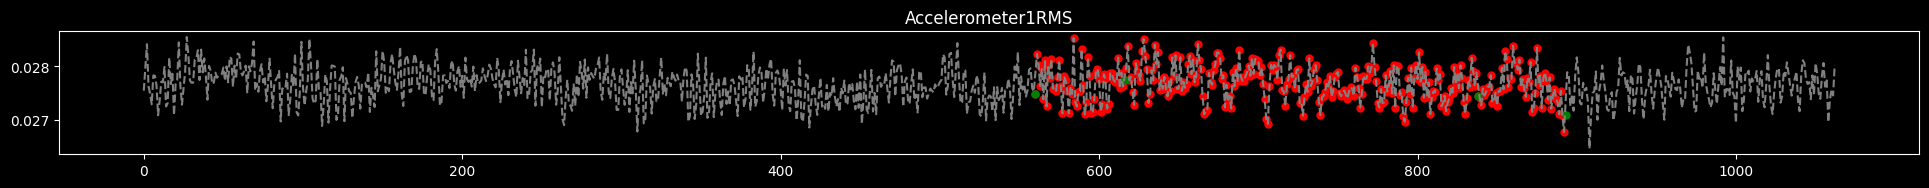

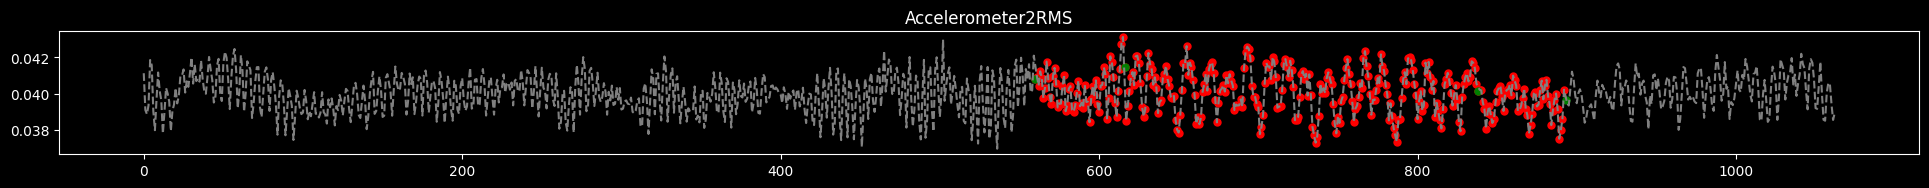

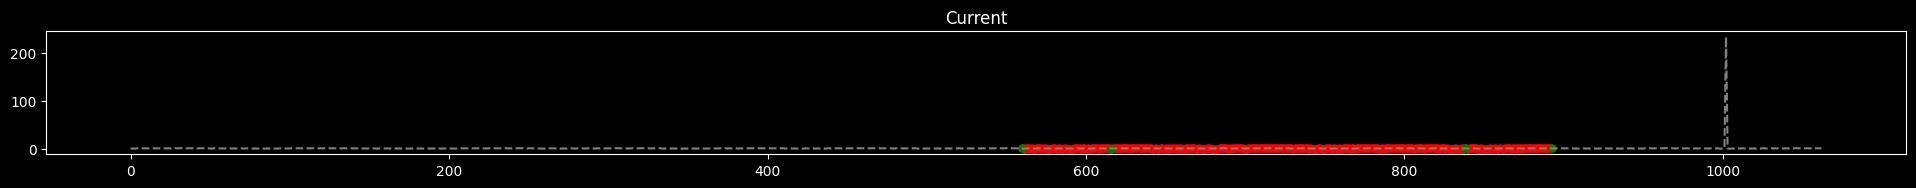

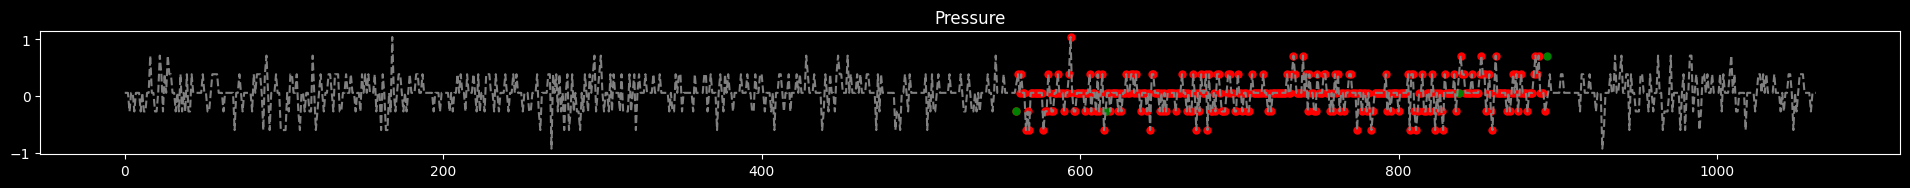

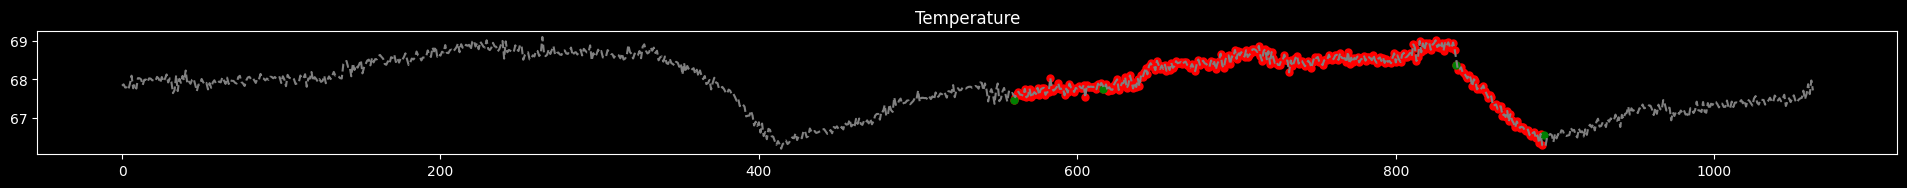

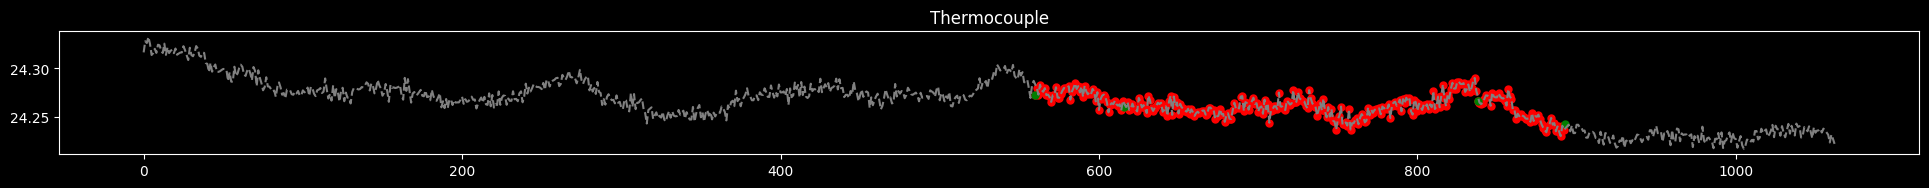

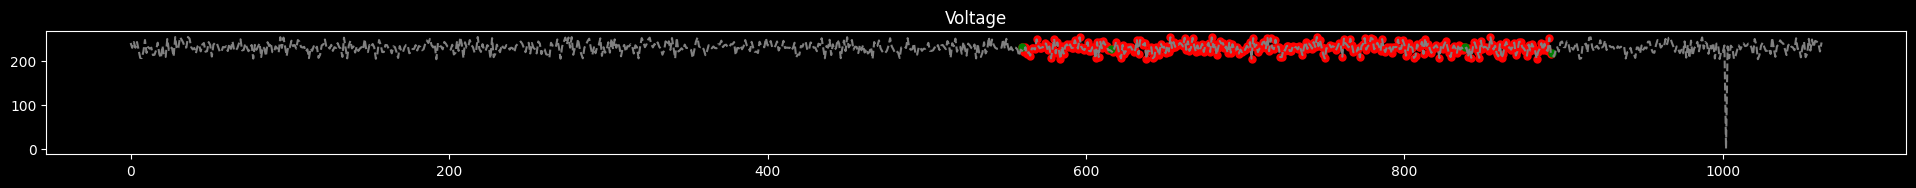

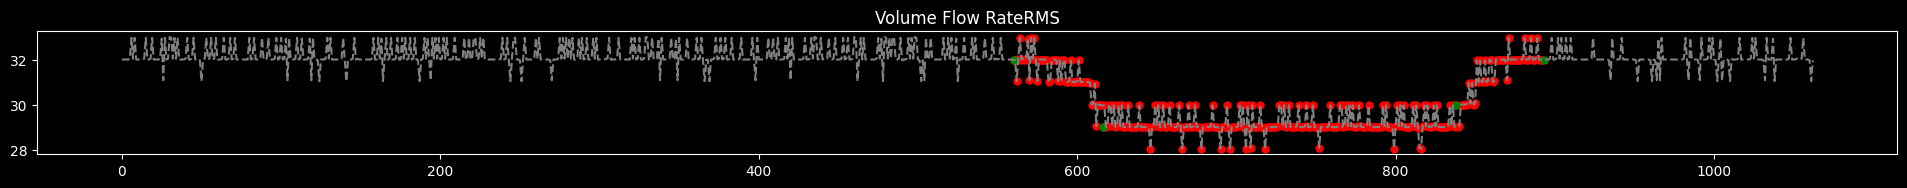

In [24]:
# ▶ for문 활용 시계열 센서 데이터 시각화
# ▶ 단일 변수로는 특별히 이상을 탐지하기 어려워 보임

for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df_anomaly.index, df_anomaly[i], 'o', color='red', markersize=5);
  plt.plot(df_change.index, df_change[i], 'o', color='green', markersize=5);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
  plt.title(i)

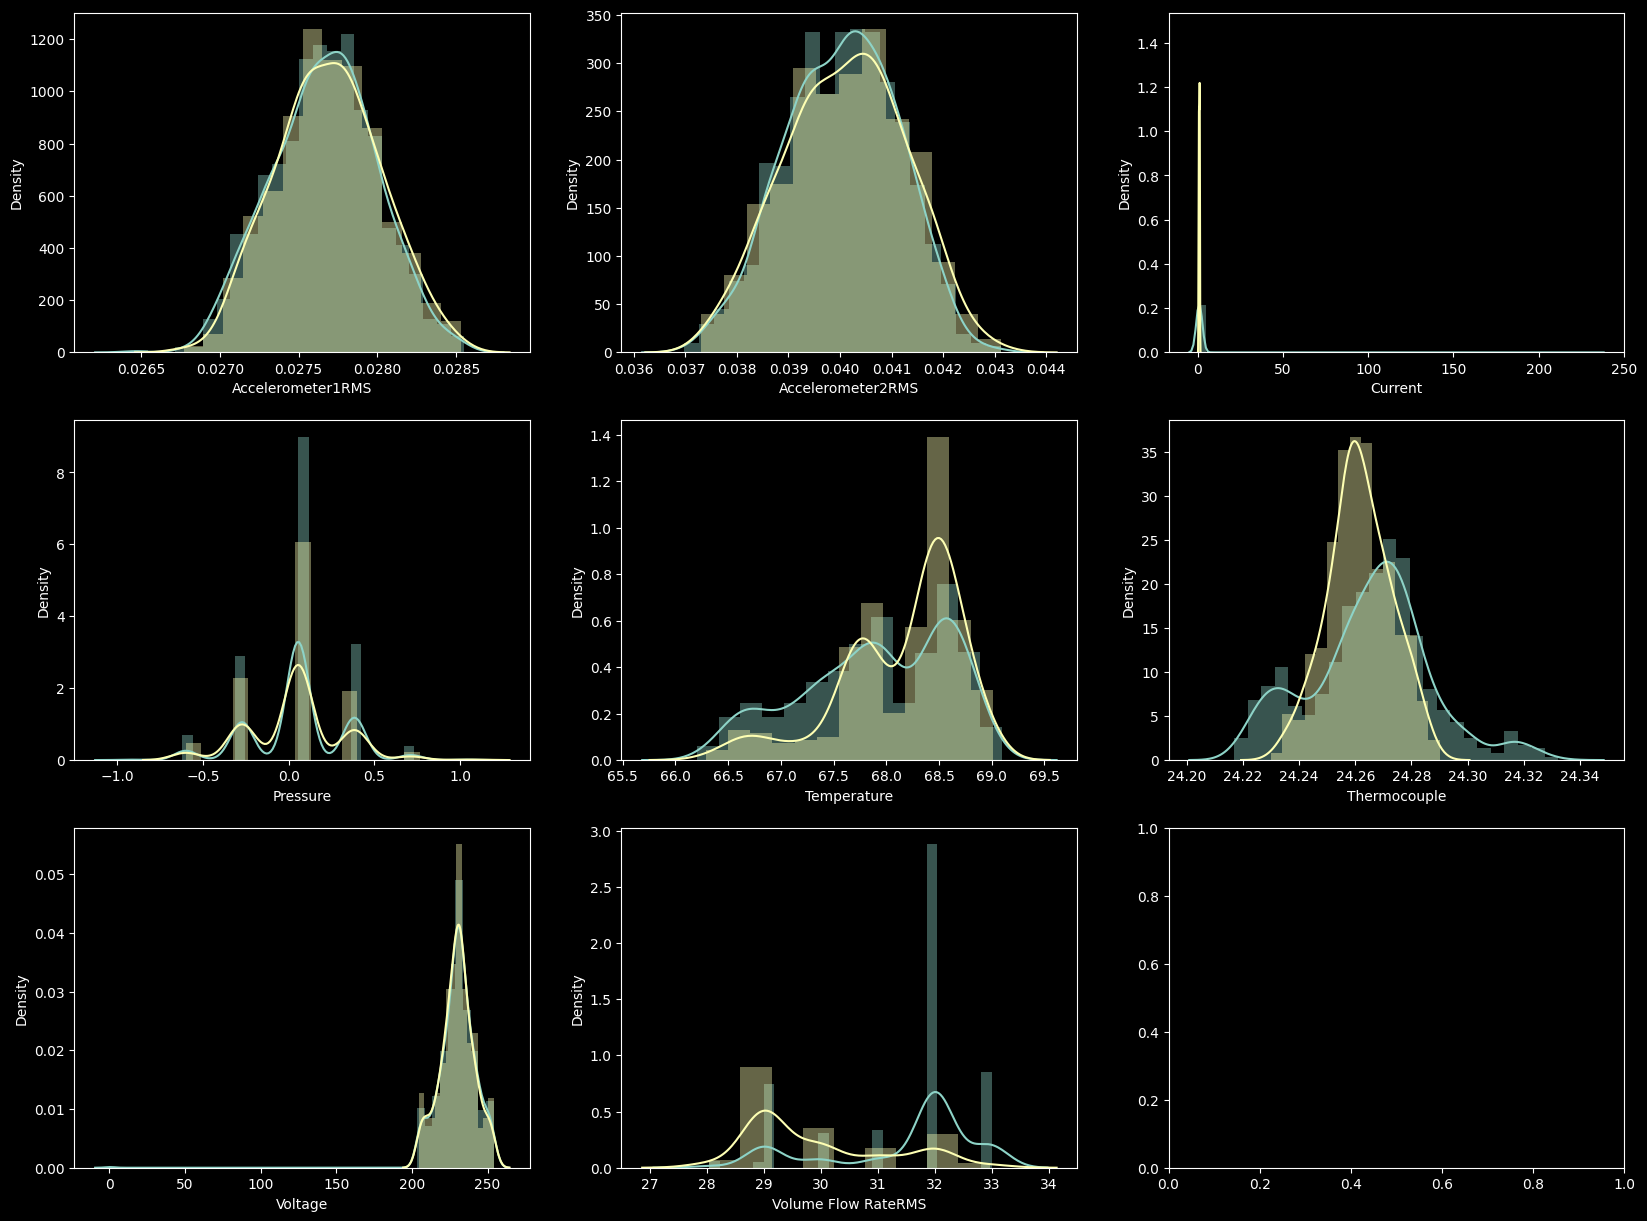

In [26]:
# ▶ for문 활용 시계열 센서 데이터 분포 시각화
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df.columns[1:9]):
    sns.distplot(df_normal[col], ax=ax[int(i/col_n),int(i%col_n)])
    sns.distplot(df_anomaly[col], ax=ax[int(i/col_n),int(i%col_n)])

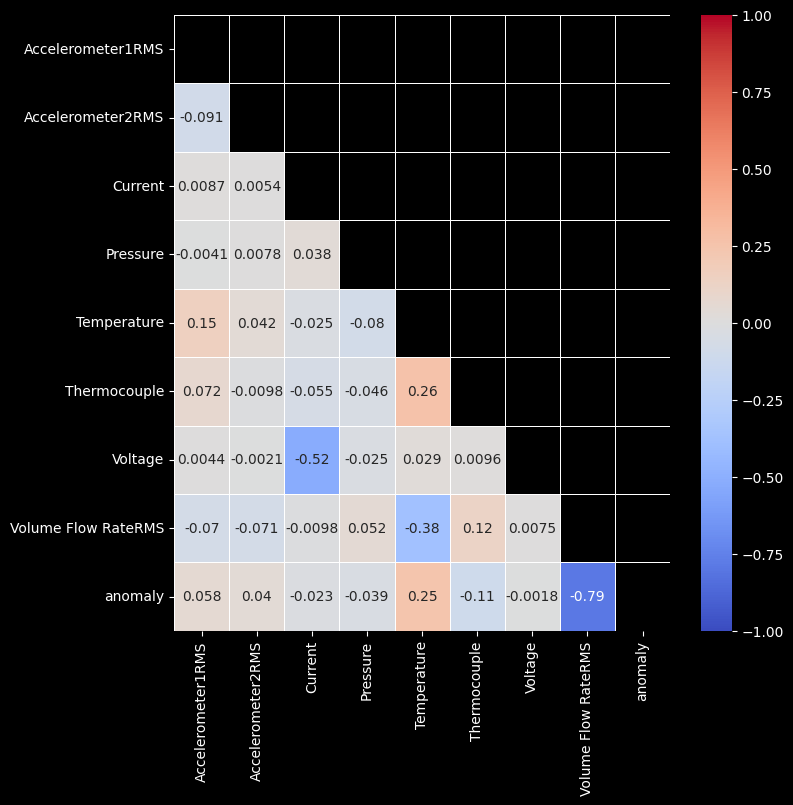

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 분석에 필요한 column만 선택
df_corr = df.iloc[:,1:-1]

# ▶ corr() 활용, numerical value 상관관계 확인 
fig = plt.figure(figsize=(8,8))
df_num = df_corr.corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5,mask=np.triu(df_num.corr()));

## **🥇Session 3**  
**┗ 이상탐지 모델링**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [28]:
# ▶ Train-Test Set split
from sklearn.model_selection import train_test_split

X=df.drop(['datetime', 'anomaly', 'changepoint'], axis=1)
Y=df['anomaly']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=123)

print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (744, 8)
x_test shape : (319, 8)
y_train shape : (744,)
y_test shape : (319,)


### · 모델 학습 및 평가
---
#### Isolation Forest

In [29]:
from sklearn.ensemble import IsolationForest
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=200, contamination = 0.30, random_state=42)
clf.fit(x_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [30]:
# ▶ 평가를 위해 다시 라벨링
y_pred_train = np.where(y_pred_train==-1, 1, 0)
y_pred_test = np.where(y_pred_test==-1, 1, 0)

In [31]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72       511
         1.0       0.37      0.35      0.36       233

    accuracy                           0.61       744
   macro avg       0.54      0.54      0.54       744
weighted avg       0.60      0.61      0.61       744

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       219
         1.0       0.32      0.33      0.33       100

    accuracy                           0.57       319
   macro avg       0.51      0.51      0.51       319
weighted avg       0.58      0.57      0.57       319



### · Scoring 기반 Threshold 조정
---

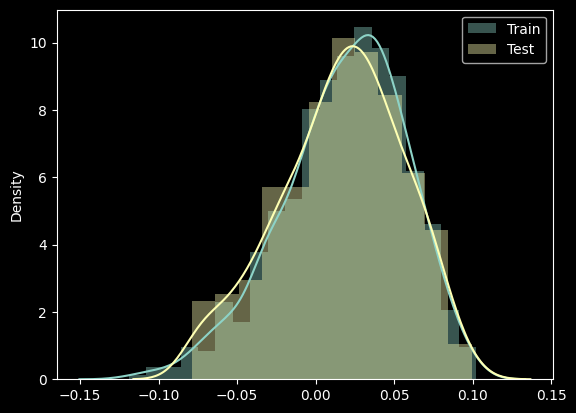

In [32]:
# ▶ 분포 시각화를 통해 Threshold 조정 (Train set/Test set)
sns.distplot(clf.decision_function(x_train), label='Train');
sns.distplot(clf.decision_function(x_test), label="Test");
plt.legend();

In [34]:
# ▶ Score 변수 할당
y_pred_train_score =  clf.decision_function(x_train)
y_pred_test_score = clf.decision_function(x_test)

# ▶ Threshold 조정
y_pred_train = np.where(y_pred_train_score < 0.05, 1, 0)
y_pred_test = np.where(y_pred_test_score < 0.05, 1, 0)

# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.78      0.24      0.37       511
         1.0       0.34      0.85      0.48       233

    accuracy                           0.43       744
   macro avg       0.56      0.55      0.43       744
weighted avg       0.64      0.43      0.41       744

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.21      0.32       219
         1.0       0.32      0.82      0.46       100

    accuracy                           0.40       319
   macro avg       0.52      0.51      0.39       319
weighted avg       0.59      0.40      0.36       319



In [35]:
pd.Series(y_pred_test).value_counts()

1    256
0     63
Name: count, dtype: int64

#### XGBoost

In [45]:
from xgboost import XGBClassifier

X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state = 123)
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1,stratify=y_train, random_state = 123)

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate = 0.05)
evals4 = [(X_tr, y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=50, 
                eval_set=evals4, verbose=False)

y_pred_tr = xgb_clf.predict(X_train)
y_pred_te = xgb_clf.predict(x_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_tr))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_te))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       511
         1.0       0.99      0.98      0.98       233

    accuracy                           0.99       744
   macro avg       0.99      0.99      0.99       744
weighted avg       0.99      0.99      0.99       744

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       219
         1.0       0.97      0.89      0.93       100

    accuracy                           0.96       319
   macro avg       0.96      0.94      0.95       319
weighted avg       0.96      0.96      0.96       319



#### Label이 있는 경우에는 tree based model을 쓰는게 성능이 훨씬 높은 것을 확인할 수 있음